.-.-...-...-.-.-...-.-...-.-.-.-...-...-.-Fehler2!


,Temp,Jahr,Monat,Tag_des_Jahres
Datum,,,,
1876-01-01,2.200,1876,1,1
1876-01-02,2.500,1876,1,2
1876-01-03,0.300,1876,1,3
1876-01-04,-5.800,1876,1,4
1876-01-05,-9.800,1876,1,5
...,...,...,...,...
2021-05-04,10.080,2021,5,124
2021-05-05,8.750,2021,5,125
2021-05-06,7.775,2021,5,126


<AxesSubplot:xlabel='Jahr', ylabel='Jahresmittel'>

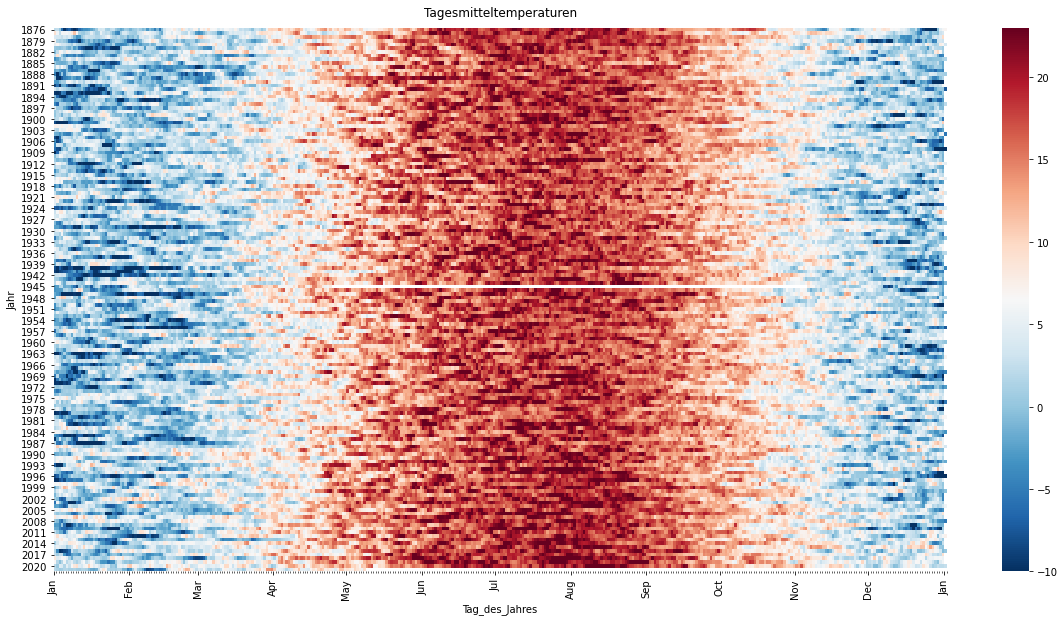

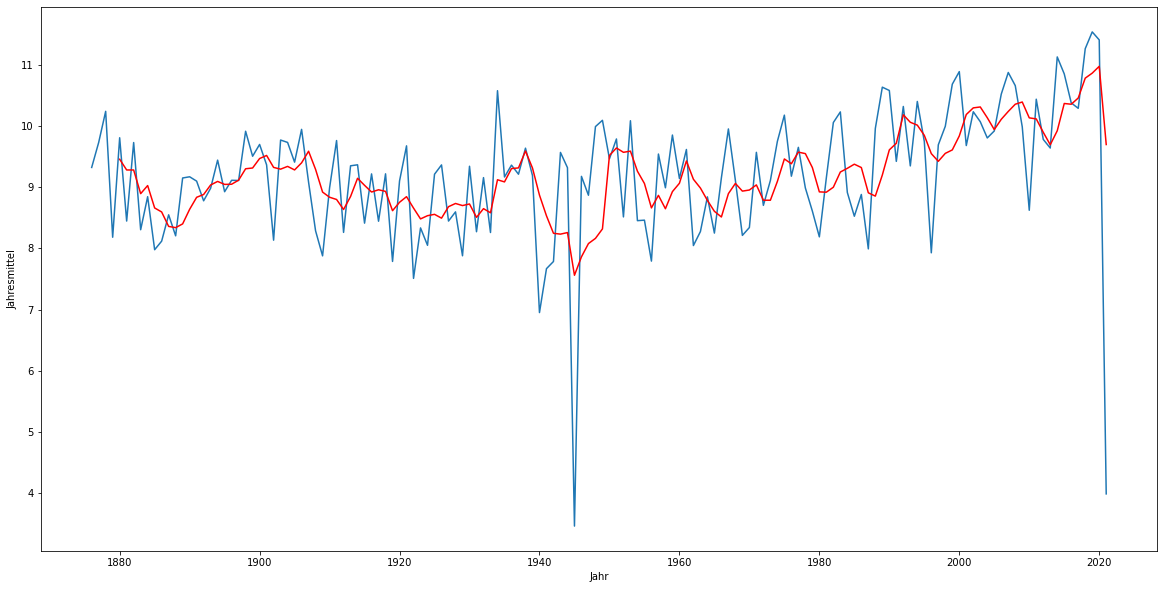

In [3]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# =============================================================================
# Beispiel-Auswertungen
# =============================================================================

from DWD_hist_weather import tagestemp_land

tageswerte = tagestemp_land('Berlin')

display(tageswerte)

# %% Heatmap der täglichen Durchschnittstemperaturen

ana = tageswerte.pivot(index='Jahr', columns='Tag_des_Jahres', values='Temp')

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(ana, vmin=-10, vmax=23, cmap="RdBu_r")
ax.axes.set_title("Tagesmitteltemperaturen", y=1.01)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# %% Jährliche Durchschnittstemperaturen plus 5-Jahres-Mittel

ana = tageswerte.pivot(index='Jahr', columns='Tag_des_Jahres', values='Temp')

ana['Jahresmittel'] = ana.mean(axis=1)
ana['Jahresmittel5'] = ana['Jahresmittel'].rolling(5).mean()

plt.subplots(figsize=(20, 10))
sns.lineplot(data=ana, x='Jahr', y='Jahresmittel')
sns.lineplot(data=ana, x='Jahr', y='Jahresmittel5', color='red')
